In [1]:
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd

import FLUCCOplus.transform as traffo
import FLUCCOplus.signals as fps
import FLUCCOplus.plots as fpp

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [2]:
signal_df = fps.load_all()

separator = 0.5
signal_df = traffo.discretize(signal_df, separator=separator)

signal_df.columns

Index(['Wind 2013', 'Wind 2015', 'Wind 2016',
       'Wind 2030, TU EEG, "Stromzukunft"', 'WEB 2015 Umgebung Wien',
       'Hochrechnung Ueberschuss 2050', 'Wind AT 2017', 'Wind AT 2018',
       'Wind AT 2019', 'Wind AT 2020', 'REF', 'REG', 'uba30', 'uba50',
       'veigl30', 'veigl50', '1.5WP-3K-PV/Battery-CO2',
       '1.3WP-3K-PV/Battery-CO2', '1.3WP-3K-keine PV/Battery-CO2/Preis',
       '1.3WP-3K-PV/Battery-CO2/Preis', '1.3WP-3K-PV/Battery-Preis',
       'Neuhof I', 'Neuhof III', 'Maustrenk', 'STERN I', 'STERN II',
       'STERN III', 'Schaltsignal_REF', 'Schaltsignal_REG',
       'Schaltsignal_UBA30', 'Schaltsignal_UBA50', 'Schaltsignal_VEIGL30',
       'Schaltsignal_VEIGL50'],
      dtype='object')

In [3]:
import seaborn as sns
result_dfs = []

# Concatenate all individual dataframes into one
final_df = fps.get_signal_points_as_df(signal_df)


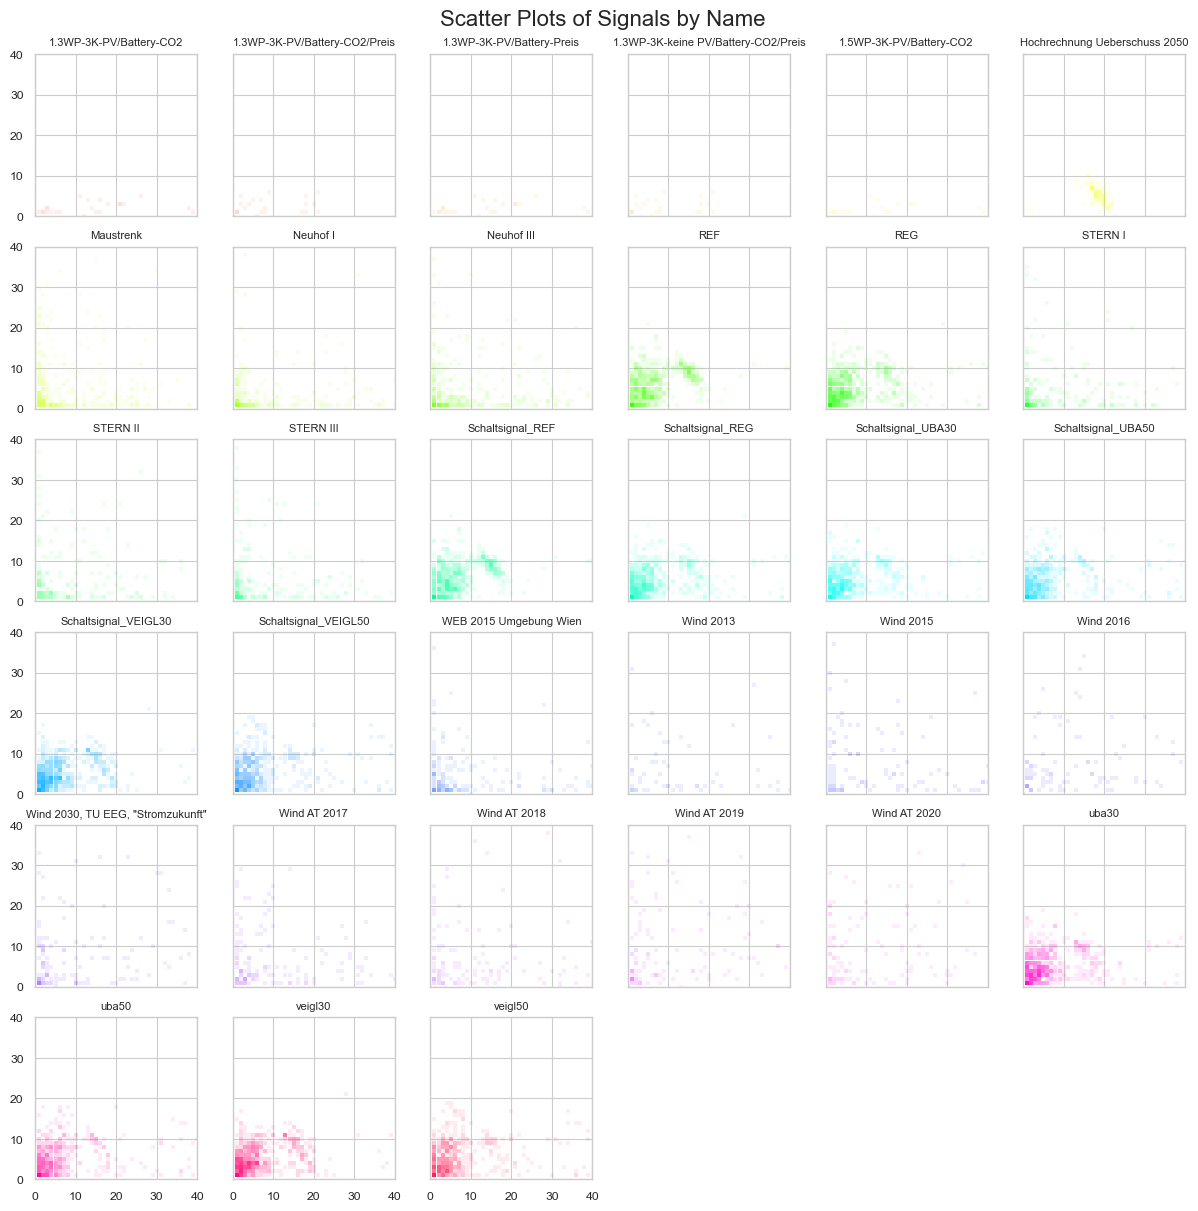

In [4]:
import matplotlib.pyplot as plt
import math
import seaborn as sns


def plot_signals_grid(df):
    """
    Create a grid of scatter plots for actual signals in the dataframe grouped by 'name'.
    Each plot will have a unique color for each group.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing 'dn', 'ds', and 'name'.
    """
    # Group the dataframe by the "name" column
    grouped = df.groupby("name")
    unique_names = df['name'].unique()

    # Number of subplots and layout
    num_columns = 6
    num_groups = len(unique_names)
    num_rows = math.ceil(num_groups / num_columns)

    # Create a color palette
    palette = sns.color_palette("hsv", num_groups)

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 2), constrained_layout=True, sharex=True, sharey=True, )

    # Flatten axes array for easier indexing
    axes = axes.flatten()
        # For storing handles and labels for the legend
    handles = []
    labels = []


    # Iterate through each group and plot
    for idx, (name, group) in enumerate(grouped):
        if len(group) < 1:  # Skip empty groups
            print(f"Skipping '{name}' - no data to plot.")
            continue

        ax = axes[idx]
        scatter= ax.scatter(group['dn'], group['ds'], alpha=0.08, color=palette[idx], label=name, linewidth=0, marker="s", s=8)
        handles.append(scatter)
        labels.append(name)
        # Set axis limits and labels
        ax.set_xlim(0, 40)
        ax.set_ylim(0, 40)
        ax.set_title(f'{name}', fontsize=8)
        ax.set_aspect("equal")
        #ax.set_xlabel('dn')
        #ax.set_ylabel('ds')

        # Add a legend
        #ax.legend()

    # Remove unused subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    # Add a main title
    fig.suptitle('Scatter Plots of Signals by Name', fontsize=16)

    # Add a combined legend at the bottom right
    #fig.legend(handles, labels, loc='lower right', title='Groups', bbox_to_anchor=(1.0, 0.), ncols=3)

    # Show the plot
    plt.show()

# Call the function to plot signals
plot_signals_grid(final_df)



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

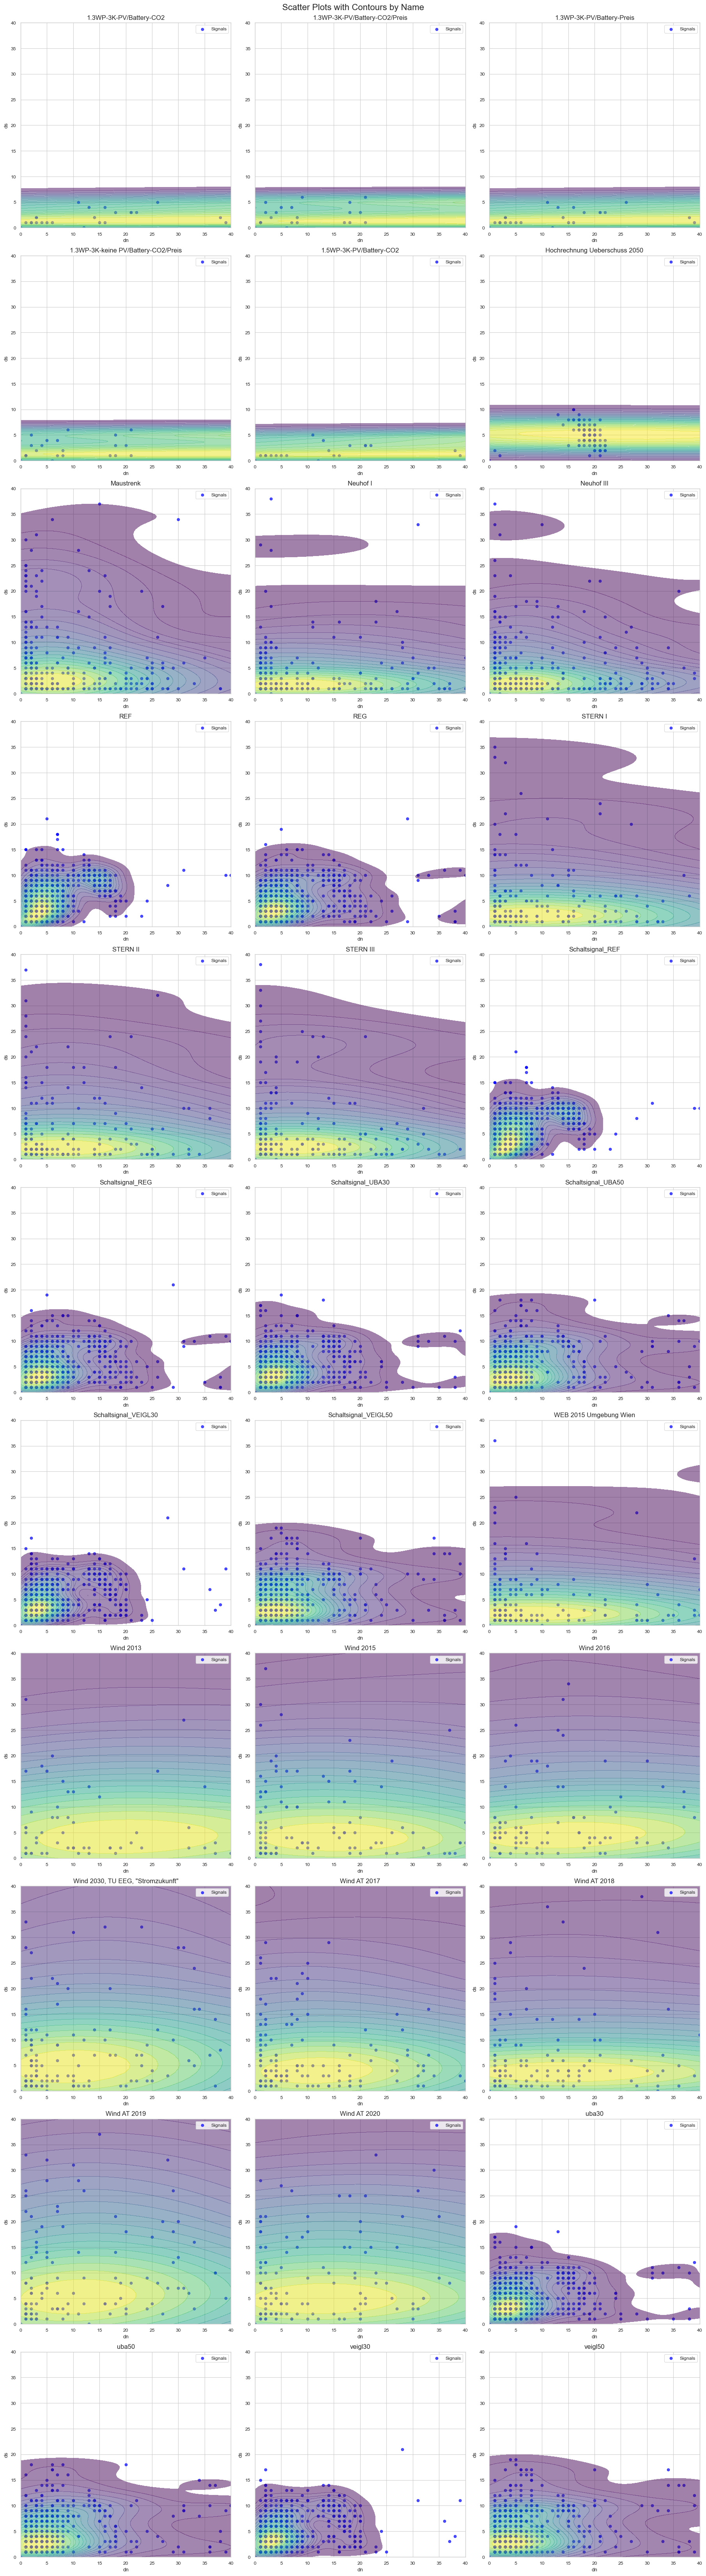

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_signals_and_contours_grid(df, num_columns=3):
    """
    Create a grid of scatter plots overlaid with contour plots for each group in the dataframe.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing 'dn', 'ds', and 'name'.
    num_columns (int): Number of columns in the grid.
    """
    # Group the dataframe by the "name" column
    grouped = df.groupby("name")

    # Number of groups and rows required
    num_groups = grouped.ngroups
    num_rows = math.ceil(num_groups / num_columns)

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 6), constrained_layout=True)
    
    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Iterate through each group and plot
    for idx, (name, group) in enumerate(grouped):
        if len(group) < 3:  # Skip groups with insufficient data for KDE
            print(f"Skipping '{name}' - insufficient data for contour plot.")
            continue

        ax = axes[idx]
        
        # Scatter plot of the signals
        ax.scatter(group['dn'], group['ds'], alpha=0.7, label='Signals', color='blue')

        # Contour plot overlaid
        sns.kdeplot(
            data=group,
            x="dn", 
            y="ds", 
            fill=True, 
            cmap="viridis", 
            levels=20, 
            alpha=0.5,  # Transparency for overlay
            ax=ax
        )

        # Set axis limits and labels
        ax.set_xlim(0, 40)
        ax.set_ylim(0, 40)
        ax.set_title(f'{name}', fontsize=12)
        ax.set_xlabel('dn')
        ax.set_ylabel('ds')

        # Add a legend
        ax.legend()

    # Remove unused subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    # Add a main title
    fig.suptitle('Scatter Plots with Contours by Name', fontsize=16)

    # Show the plot
    plt.show()

# Call the function to plot signals and contours
plot_signals_and_contours_grid(final_df, num_columns=3)
